<a href="https://colab.research.google.com/github/aml21/Project1/blob/main/Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Descriptive statistics

### Exploratory data analysis (EDA).

#### 1st dataset

Overview

Earlier in the program, you learned about the process of exploratory data analysis, or EDA, from discovering to presenting your data. Whenever a data professional works with a new dataset, the first step is to understand the context of the data during the discovering stage. Often, this involves discussing the data with project stakeholders and reading documentation about the dataset and the data collection process. After that, the data professional moves on to data cleaning and addresses issues like missing data, incorrect values, and irrelevant data. Computing descriptive stats is a common step to take after data cleaning. In this notebook, we will use descriptive stats to get a basic understanding of the literacy rate data for each district in your education dataset.

Import packages and libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
education_districtwise = pd.read_csv('/content/sample_data/education_districtwise.csv')

Explore the data

In [ ]:
education_districtwise.head(10)

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI
0,DISTRICT32,STATE1,13,391,104,875564.0,66.92
1,DISTRICT649,STATE1,18,678,144,1015503.0,66.93
2,DISTRICT229,STATE1,8,94,65,1269751.0,71.21
3,DISTRICT259,STATE1,13,523,104,735753.0,57.98
4,DISTRICT486,STATE1,8,359,64,570060.0,65.00
5,DISTRICT323,STATE1,12,523,96,1070144.0,64.32
6,DISTRICT114,STATE1,6,110,49,147104.0,80.48
7,DISTRICT438,STATE1,7,134,54,143388.0,74.49
8,DISTRICT610,STATE1,10,388,80,409576.0,65.97
9,DISTRICT476,STATE1,11,361,86,555357.0,69.90


**Note:** To interpret this data correctly, it’s important to understand that each row, or observation,
 refers to a different district (and not, for example, to a state or a village). So, the VILLAGES column
 indicates how many villages are in each district, the TOTPOPULAT column indicates the population
 for each district, and the OVERALL_LI column indicates the literacy rate for each district.

Compute descriptive stats

In [ ]:
education_districtwise.describe()

,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI
count,680.000000,680.000000,680.000000,6.340000e+02,634.000000
mean,10.760294,874.614706,121.226471,1.899024e+06,73.395189
std,9.585360,622.711657,94.040172,1.547475e+06,10.098460
min,1.000000,6.000000,1.000000,7.948000e+03,37.220000
25%,5.000000,390.750000,56.750000,8.226940e+05,66.437500
50%,8.000000,785.500000,101.000000,1.564392e+06,73.490000
75%,13.000000,1204.250000,162.500000,2.587520e+06,80.815000
max,66.000000,3963.000000,592.000000,1.105413e+07,98.760000


Our main interest is the literacy rate. This data is contained in the OVERALL_LI column, which shows the literacy rate for each district in the nation. Use the describe() function to reveal key stats about literacy rate.

In [ ]:
education_districtwise['OVERALL_LI'].describe()

,OVERALL_LI
count,634.000000
mean,73.395189
std,10.098460
min,37.220000
25%,66.437500
50%,73.490000
75%,80.815000
max,98.760000


The summary of stats gives us valuable information about the overall literacy rate. For example, the mean helps to clarify the center of your dataset; we now know the average literacy rate is about 73% for all districts. This information is useful in itself and also as a basis for comparison. Knowing the mean literacy rate for all districts helps us understand which individual districts are significantly above or below the mean.

**Note:** describe() excludes missing values (NaN) in the dataset from consideration. You may notice that the count, or the number of observations for OVERALL_LI (634), is fewer than the number of rows in the dataset (680). Dealing with missing values is a complex issue outside the scope of this course.

In [ ]:
education_districtwise['STATNAME'].describe()

,STATNAME
count,680
unique,36
top,STATE21
freq,75


The unique category indicates that there are 36 states in our dataset. The top category indicates
that STATE21 is the most commonly occurring value, or mode. The frequency category tells you
 that STATE21 appears in 75 rows, which means it includes 75 different districts.

The unique category indicates that there are 36 states in our dataset. The top category indicates
that STATE21 is the most commonly occurring value, or mode. The frequency category tells you
 that STATE21 appears in 75 rows, which means it includes 75 different districts.


Use max() and min() to compute range

Recall that the range is the difference between the largest and smallest values in a dataset. In other words, range = max- min. You can use max() and min() to compute the range for the literacy rate of all districts in your dataset.

In [ ]:
range_overall_li = education_districtwise['OVERALL_LI'].max() - education_districtwise['OVERALL_LI'].min()
range_overall_li

61.540000000000006

The range in literacy rates for all districts is about 61.5 percentage points.

This large difference tells you that some districts have much higher literacy rates than others. Later on, you will continue to analyze this data, and you can discover which districts have the lowest literacy rates. This will help the government better understand literacy rates nationally and build on their successful educational programs.


#### 2nd Dataset

Overview

Data professionals often use descriptive statistics to understand the data they are working with and provide collaborators with a summary of the relative location of values in the data, as well an information about its spread.

For this activity, you are a member of an analytics team for the United States Environmental Protection Agency (EPA). You are assigned to analyze data on air quality with respect to carbon monoxide, a major air pollutant. The data includes information from more than 200 sites, identified by state, county, city, and local site names. You will use Python functions to gather statistics about air quality, then share insights with stakeholders.


For this activity, you are a member of an analytics team for the United States Environmental Protection Agency (EPA). You are assigned to analyze data on air quality with respect to carbon monoxide, a major air pollutant. The data includes information from more than 200 sites, identified by state, county, city, and local site names. You will use Python functions to gather statistics about air quality, then share insights with stakeholders.

Imports

Load the dataset into a DataFrame. The dataset provided is in the form of a .csv file named c4_epa_air_quality.csv. It contains a subset of data from the U.S. EPA.

In [ ]:
epa_data = pd.read_csv("/content/sample_data/c4_epa_air_quality.csv", index_col = 0)

Data exploration

In [ ]:
epa_data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.994737,14
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.200000,2
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,0.200000,2
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,0.400000,5
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,0.300000,6


**Question:** What does the aqi column represent?

The aqi column represents the EPA’s Air Quality Index (AQI).

Now, get a table that contains some descriptive statistics about the data.

In [ ]:
epa_data.describe()

,arithmetic_mean,aqi
count,260.000000,260.000000
mean,0.403169,6.757692
std,0.317902,7.061707
min,0.000000,0.000000
25%,0.200000,2.000000
50%,0.276315,5.000000
75%,0.516009,9.000000
max,1.921053,50.000000


**Question:** Based on the table of descriptive statistics, what do you notice about the count value
for the aqi column?

There are 260 aqi measurements represented in this dataset.

**Question:** What do you notice about the 25th percentile for the aqi column? This is an important
measure for understanding where the aqi values lie.

The 25% of the aqi values in the data are below 2.

**Question:** What do you notice about the 75th percentile for the aqi column? This is another important measure for understanding where the aqi values lie.

The 75% of the aqi values in the data are below 9.

Next, get some descriptive statistics about the states in the data.

In [ ]:
 epa_data["state_name"].describe()

,state_name
count,260
unique,52
top,California
freq,66


**Question:** What do you notice while reviewing the descriptive statistics about the states in the data?

**Note:** Sometimes you have to individually calculate statistics. To review to that approach, use the numpy library to calculate each of the main statistics in the preceding table for the aqi column.

There are 260 state values, 52 of them are unique. With a frequency of 66 California is the most commonly occurring state in the data.

Results and evaluation

Now, compute the mean value from the aqi column.

In [ ]:
np.mean(epa_data['aqi'])

np.float64(6.757692307692308)

**Question:** What do you notice about the mean value from the aqi column? This is an important measure, as it tells you what the average air quality is based on the data.

The average aqi from the data is approximately 6.76.

Next, compute the median value from the aqi column.

In [ ]:
np.median(epa_data['aqi'])

np.float64(5.0)

**Question:** What do you notice about the median value from the aqi column? This is an important measure for understanding the central location of the data.

The median value for the aqi column is 5.0, in ther words, the half of the aqi values in the data are below 5.

Next, identify the minimum value from the aqi column.

In [ ]:
np.min(epa_data['aqi'])

0

**Question:** What do you notice about the minimum value from the aqi column? This is an important measure, as it tell you the best air quality observed in the data.

The smallest aqi value in the data is 0.

Now, identify the maximum value from the aqi column.

In [ ]:
np.max(epa_data['aqi'])

50

**Question:** What do you notice about the maximum value from the aqi column? This is an important measure, as it tells you which value in the data corresponds to the worst air quality observed in the data.

The largest aqi value in the data is 50.

Now, compute the standard deviation for the aqi column. By default, the numpy library uses 0 as the Delta Degrees of Freedom, while pandas library uses 1. To get the same value for standard deviation using either library, specify the ddof parameter to 1 when calculating standard deviation.

In [ ]:
np.std(epa_data["aqi"], ddof=1)

7.0617066788207215

**Question:** What do you notice about the standard deviation for the aqi column? This is an important measure of how spread out the aqi values are.

The standard deviation is approximately 7.05 (rounding to 2 decimal).

This is a measure of how spread out the aqi values are in the data.

**Considerations**

“AQI values at or below 100 are generally thought of as satisfactory. When AQI values are above 100, air quality is considered to be unhealthy—at first for certain sensitive groups of people, then for everyone as AQI values increase.”- “An AQI of 100 for carbon monoxide corresponds to a level of 9.4 parts per million.”

**Key points:**  

• 75% of the AQI values in the data are below 9, this is considered good air quality.

• Less healthy locations should be investigated to understand and improve those air air conditions.

# 2. Probability distributions

#### 1st dataset

Overview

In this notebook, we will continue with the previous scenario in which you’re a data professional working for the Department of Education of a large nation. Recall that we are analyzing data on the literacy rate for each district, and we have already computed descriptive statistics to summarize your data. For the next part of our analysis, we want to find out if the data on district literacy rate fits a specific type of probability distribution.

Import packages and libraries

Use dropna() to remove missing values in your data.

In [ ]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 from scipy import stats

 education_districtwise = pd.read_csv('/content/sample_data/education_districtwise.csv')
 education_districtwise = education_districtwise.dropna()

NOTE: You can use dropna() to remove missing values in your data.

Plot a histogram

The first step in trying to model your data with a probability distribution is to plot a histogram.
This will help you visualize the shape of your data and determine if it resembles the shape of a
specific distribution.

Let’s use matplotlib’s histogram function to plot a histogram of the district literacy rate data.
Recall that the OVERALL_LI column contains this data.


<Axes: >

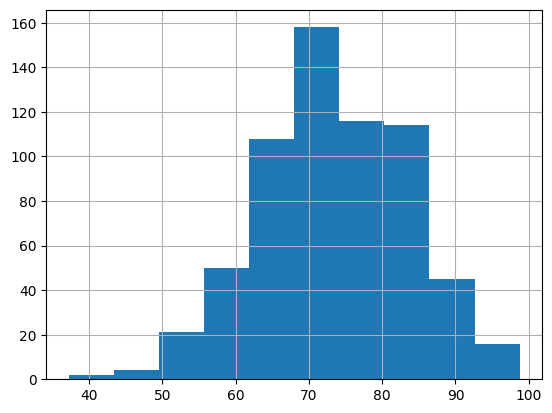

In [ ]:
education_districtwise['OVERALL_LI'].hist()

1.3.2 Normal distribution

 The histogram shows that the distribution of the literacy rate data is bell-shaped and symmetric about the mean. The mean literacy rate, which is around 73%, is located in the center of the plot.

 Recall that the normal distribution is a continuous probability distribution that is bell-shaped
 and symmetrical on both sides of the mean. The shape of the histogram suggests that the normal distribution might be a good modeling option for the data.

 1.3.3 Empirical rule

 Since the normal distribution seems like a good fit for the district literacy rate data, we can expect the empirical rule to apply relatively well. Recall that the empirical rule says that for a normal distribution:

    • 68%of the values fall within +/- 1 SD from the mean
    • 95%of the values fall within +/- 2 SD from the mean
    • 99.7% of the values fall within +/- 3 SD from the mean

 NOTE: “SD” stands for standard deviation.

 In other words, we can expect that about:

    • 68%of district literacy rates will fall within +/- 1 SD from the mean.
    • 95%of district literacy rates will fall within +/- 2 SD from the mean.
    • 99.7% of district literacy rates will fall within +/- 3 SD from the mean.

 First, we will name two new variables to store the values for the mean and standard deviation of the district literacy rate: mean_overall_li and std_overall_li.


In [ ]:
mean_overall_li = education_districtwise['OVERALL_LI'].mean()
mean_overall_li

np.float64(73.39518927444796)

The mean district literacy rate is about 73.4%.

In [ ]:
std_overall_li = education_districtwise['OVERALL_LI'].std()
std_overall_li

10.098460413782469

The standard deviation is about 10%.

 Now, let’s compute the actual percentage of district literacy rates that fall within +/- 1 SD from the mean.
 To do this, we will first name two new variables: lower_limit and upper_limit. The lower limit will be one SD below the mean, or the mean- (1 * SD). The upper limit will be one SD above the mean, or the mean + (1 * SD). To write the code for the calculations, we will use our two previous variables, mean_overall_li and std_overall_li, for the mean and standard deviation.

Then, wewill add a newline of code that tells the computer to decide if each value in the OVERALL_LI column is between the lower limit and upper limit. To do this, we will use the relational operators greater than or equal to (>=) and less than or equal to (<=), and the bitwise operator AND (&).

Finally, we will use mean() to divide the number of values that are within 1 SD of the mean by the total number of values.

In [ ]:
lower_limit = mean_overall_li- 1 * std_overall_li
upper_limit = mean_overall_li + 1 * std_overall_li
((education_districtwise['OVERALL_LI'] >= lower_limit) & (education_districtwise['OVERALL_LI'] <= upper_limit)).mean()

np.float64(0.6640378548895899)

 Next, let’s use the same code structure to compute the actual percentage of district literacy rates that fall within +/- 2 SD from the mean.

In [ ]:
lower_limit = mean_overall_li- 2 * std_overall_li
upper_limit = mean_overall_li + 2 * std_overall_li
((education_districtwise['OVERALL_LI'] >= lower_limit) & (education_districtwise['OVERALL_LI'] <= upper_limit)).mean()

np.float64(0.9542586750788643)

Finally, we will use the same code structure to compute the actual percentage of district literacy rates that fall within +/- 3 SD from the mean.

In [ ]:
lower_limit = mean_overall_li- 3 * std_overall_li
upper_limit = mean_overall_li + 3 * std_overall_li
((education_districtwise['OVERALL_LI'] >= lower_limit) & (education_districtwise['OVERALL_LI'] <= upper_limit)).mean()

np.float64(0.9968454258675079)

Our values agree quite well with the empirical rule!

Our values of 66.4%, 95.4%, and 99.6% are very close to the values the empirical rule suggests: roughly 68%, 95%, and 99.7%.

Knowing that your data is normally distributed is useful for analysis because many statistical tests and machine learning models assume a normal distribution. Plus, when your data follows a normal distribution, you can use z-scores to measure the relative position of your values and find outliers in your data.

Compute z-scores to find outliers

Recall that a z-score is a measure of how many standard deviations below or above the population mean a data point is. A z-score is useful because it tells you where a value lies in a distribution.

Data professionals often use z-scores for outlier detection. Typically, they consider observations with a z-score smaller than-3 or larger than +3 as outliers. In other words, these are values that lie more than +/- 3 SDs from the mean.

To find outliers in the data, we will first create a new column called Z_SCORE that includes the z-scores for each district literacy rate in your dataset. Recall that the OVERALL_LI column lists all the district literacy rates.

Then, we will compute the z-scores using the function scipy.stats.zscore().

Reference: scipy.stats.zscore

In [ ]:
education_districtwise['Z_SCORE'] = stats.zscore(education_districtwise['OVERALL_LI'])
education_districtwise

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI,Z_SCORE
0,DISTRICT32,STATE1,13,391,104,875564.0,66.92,-0.641712
1,DISTRICT649,STATE1,18,678,144,1015503.0,66.93,-0.640721
2,DISTRICT229,STATE1,8,94,65,1269751.0,71.21,-0.216559
3,DISTRICT259,STATE1,13,523,104,735753.0,57.98,-1.527694
4,DISTRICT486,STATE1,8,359,64,570060.0,65.00,-0.831990
...,...,...,...,...,...,...,...,...
675,DISTRICT522,STATE29,37,876,137,5296396.0,78.05,0.461307
676,DISTRICT498,STATE29,64,1458,230,4042191.0,56.06,-1.717972
677,DISTRICT343,STATE29,59,1117,216,3483648.0,65.05,-0.827035
678,DISTRICT130,STATE29,51,993,211,3522644.0,66.16,-0.717030


Now that we have computed z-scores for our dataset,we will write some code to identify outliers, or districts with z-scores that are more than +/- 3 SDs from the mean. Let’s use the relational operators greater than (>) and less than (<), and the bitwise operator OR (|).

In [ ]:
education_districtwise[(education_districtwise['Z_SCORE'] > 3) | (education_districtwise['Z_SCORE'] <-3)]

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI,Z_SCORE
434,DISTRICT461,STATE31,4,360,53,532791.0,42.67,-3.044964
494,DISTRICT429,STATE22,6,612,62,728677.0,37.22,-3.585076


Using z-scores, we can identify two outlying districts that have unusually low literacy rates: DISTRICT461 and DISTRICT429. The literacy rates in these two districts are more than 3 SDs below the overall mean literacy rate.

Our analysis gives us important information to share. The government may want to provide more funding and resources to these two districts in the hopes of significantly improving literacy.

#### 2nd dataset

Air Quality Index (AQI)

Now, your main goals is to determine which regions need support to make air quality improvements. Given that carbon monoxide is a major air pollutant, you will investigate data from the Air Quality Index (AQI) with respect to carbon monoxide.

Import libraries and documents

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

data = pd.read_csv("/content/sample_data/modified_c4_epa_air_quality.csv")

 To better understand the quantity of data you are working with, display head function and the number of rows and the number of columns.

In [ ]:
print(data.shape)
print()
print(data.head(5))

(260, 8)

   date_local    state_name   county_name      city_name  \
0  2018-01-01       Arizona      Maricopa        Buckeye   
1  2018-01-01          Ohio       Belmont      Shadyside   
2  2018-01-01       Wyoming         Teton  Not in a city   
3  2018-01-01  Pennsylvania  Philadelphia   Philadelphia   
4  2018-01-01          Iowa          Polk     Des Moines   

                                     local_site_name   parameter_name  \
0                                            BUCKEYE  Carbon monoxide   
1                                          Shadyside  Carbon monoxide   
2  Yellowstone National Park - Old Faithful Snow ...  Carbon monoxide   
3                             North East Waste (NEW)  Carbon monoxide   
4                                          CARPENTER  Carbon monoxide   

    units_of_measure   aqi_log  
0  Parts per million  2.079442  
1  Parts per million  1.791759  
2  Parts per million  1.098612  
3  Parts per million  1.386294  
4  Parts per million  1.3

Create a histogram to visualize the distribution of aqi_log. Then, based on its shape, visually determine if it resembles a particular distribution.

<Axes: >

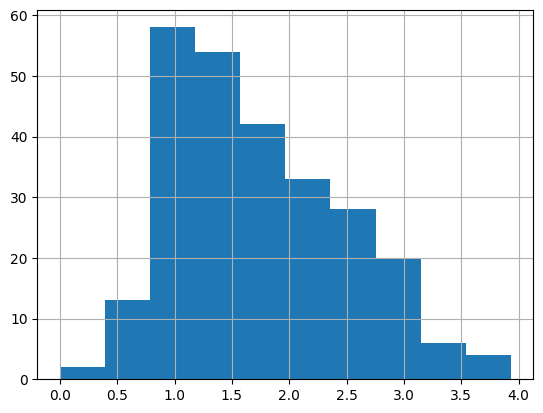

In [ ]:
data['aqi_log'].hist()

**Question:** What do you observe about the shape of the distribution from the histogram?

There is a little right skew, but it still appears to be a normal distribution similar than a bell.

Statistical tests

Use the empirical rule to observe the data, then test and verify that it is normally distributed. As you have learned, the empirical rule states that, for every normal distribution:- 68% of the data
fall within 1 standard deviation of the mean- 95% of the data fall within 2 standard deviations of the mean- 99.7% of the data fall within 3 standard deviations of the mean First, define two variables to store the mean and standard deviation, respectively, for aqi_log. Creating these variables will help you easily access these measures as you continue with the calculations involved in applying the empirical rule.

In [ ]:
# Define variable for aqi_log mean.
mean_aqi_log = data["aqi_log"].mean()

# Print out the mean.
print(mean_aqi_log)

1.7669210929985582


In [ ]:
# Define variable for aqi_log standard deviation.
std_aqi_log = data["aqi_log"].std()

# Print out the standard deviation.
print(std_aqi_log)

0.7147155520223721


Now, check the first part of the empirical rule: whether 68% of the aqi_log data falls within 1
 standard deviation of the mean.

 To compute the actual percentage of the data that satisfies this criteria, define the lower limit (for example, 1 standard deviation below the mean) and the upper limit (for example, 1 standard deviation above the mean). This will enable you to create a range and confirm whether each value falls within it.


In [ ]:
# Define variable for lower limit, 1 standard deviation below the mean.
lower_limit = mean_aqi_log- 1 * std_aqi_log

# Define variable for upper limit, 1 standard deviation above the mean.
upper_limit = mean_aqi_log + 1 * std_aqi_log

# Display lower_limit, upper_limit.
print(lower_limit, upper_limit)

1.052205540976186 2.4816366450209304


Use the variables that you defined for mean and standard deviation of aqi_log, ensuring the spelling is correct.

Call the print function and pass in the values one after the other, with a comma between them.

In [ ]:
# Display the actual percentage of data that falls within 1 standard deviation of the mean.
((data["aqi_log"] >= lower_limit) & (data["aqi_log"] <= upper_limit)).mean() * 100

np.float64(76.15384615384615)

The mean() function can be used to compute the proportion of the data that satisfies the specified conditions.

 Multiplying that proportion by 100 can get you the percentage.

 Now, consider the second part of the empirical rule: whether 95% of the aqi_log data falls within 2 standard deviations of the mean.

 To compute the actual percentage of the data that satisfies this criteria, define the lower limit (for example, 2 standard deviations below the mean) and the upper limit (for example, 2 standard deviations above the mean). This will enable you to create a range and confirm whether each value falls within it.

In [ ]:
# Define variable for lower limit, 2 standard deviations below the mean.
lower_limit = mean_aqi_log- 2 * std_aqi_log

# Define variable for upper limit, 2 standard deviations below the mean.
upper_limit = mean_aqi_log + 2 * std_aqi_log

# Display lower_limit, upper_limit.
print(lower_limit, upper_limit)

0.3374899889538139 3.1963521970433026


Use the variables that you defined for mean and standard deviation of aqi_log, ensuring the spelling is correct.

Call the print function and pass in the values one after the other, with a comma between them.

In [ ]:
# Display the actual percentage of data that falls within 2 standard deviations of the mean.
((data["aqi_log"] >= lower_limit) & (data["aqi_log"] <= upper_limit)).mean() * 100

np.float64(95.76923076923077)

Now, consider the third part of the empirical rule:whether 99.7% of the aqi_log data falls within 3 standard deviations of the mean.

 To compute the actual percentage of the data that satisfies this criteria, define the lower limit (for example, 3 standard deviations below the mean) and the upper limit (for example, 3 standard deviations above the mean). This will enable you to create a range and confirm whether each value falls within it.

In [ ]:
# Define variable for lower limit, 3 standard deviations below the mean.
lower_limit = mean_aqi_log- 3 * std_aqi_log

# Define variable for upper limit, 3 standard deviations above the mean.
upper_limit = mean_aqi_log + 3 * std_aqi_log

# Display lower_limit, upper_limit.
print(lower_limit, upper_limit)

-0.37722556306855815 3.9110677490656744


Use the variables that you defined for mean and standard deviation of aqi_log, ensuring the spelling is correct.

Call the print function and pass in the values one after the other, with a comma between them.

In [ ]:
# Display the actual percentage of data that falls within 3 standard deviations of the mean.
((data["aqi_log"] >= lower_limit) & (data["aqi_log"] <= upper_limit)).mean() * 100

np.float64(99.61538461538461)

The mean() function can be used to compute the proportion of the data that satisfies the specified conditions.

 Multiplying that proportion by 100 can get you the percentage.

 Step 4: Results and evaluation

 **Question:** What results did you attain by applying the empirical rule?- About 76.15% of the data falls within 1 standard deviation of the mean.- About 95.77% of the data falls within 2 standard deviation of the mean.- About 99.62% of the data falls within 3 standard deviations of the mean.

The 95.77% is very close to 95%, and the 99.62% is very close to 99.7%. The 76.15% is relatively close to 68%. Overall, from applying the empirical rule, the data could be considered approximately normal.

** Question:** How would you use z-score to find outliers?

Z-score indicates the relative position of values it can be used to detect outliers.

Z-score could be used to identify outliers, which are values that lie more than 3 standard deviations below or above the mean.

Compute the z-score for every aqi_log value. Then, add a column named z_score in the data to store those results.


In [ ]:
# Compute the z-score for every aqi_log value, and add a column named z_score in the data to store those results.
data["z_score"] = stats.zscore(data["aqi_log"], ddof=1) # ddof=degrees of freedom correction (sample vs. population)

# Display the first 5 rows to ensure that the new column was added.
data.head()

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442,0.437265
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759,0.034753
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612,-0.935070
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294,-0.532557
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294,-0.532557


Call the zscore() function and pass in the aqi column from the data.

Identify the parts of the data where aqi_log is above or below 3 standard deviations of the mean.

In [ ]:
# Display data where `aqi_log` is above or below 3 standard deviations of the mean
data[(data["z_score"] > 3) | (data["z_score"] <-3)]

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
244,2018-01-01,Arizona,Maricopa,Phoenix,WEST PHOENIX,Carbon monoxide,Parts per million,3.931826,3.029044


To index the DataFrame, place a pair of parantheses around the evaluation of the two conditions and pass that into a pair of square brackets. This will allow you to get all rows in the data where the specified criteria is met.

 Make sure the spelling of the column matches the name you specified when creating that column.

 **Question:** What do you observe about potential outliers based on the calculations?

 The aqi_log for West Phoenix is slightly above 3 standard deviations of the mean. This means
 that the air quality at that site is worse than the rest of the sites represented in the data.

**Question:** Why is outlier detection an important part of this project?

Detecting outliers is important because they can reveal two important things, depending on the context: First, they can identify measurements that were taken incorrectly. Second, they can highlight parts of the data that can be focused on to make improvements.

For example, if the aqi_log for West Phoenix is considered an outlier, then that site can be studied further to determine what practices or changes might improve the air quality.

**What summary would you provide to stakeholders?**

The distribution of the aqi_log data is approximately normal.

Using statistical methods, Phoenix was identify as the worse air quality of all.

Improving air quality in Phoenix could be achieved through more research.


# 3. Sampling

Import libraries and document

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

education_districtwise = pd.read_csv('/content/sample_data/education_districtwise.csv')
education_districtwise = education_districtwise.dropna()

We’ll continue with our previous scenario, in which you’re a data professional working for the Department of Education of a large nation. Recall that you’re analyzing data on the literacy rate
for each district.

Now imagine that you are asked to collect the data on district literacy rates, and that you have limited time to do so. You can only survey 50 randomly chosen districts, instead of the 634 districts included in your original dataset. The goal of your research study is to estimate the mean literacy rate for all 634 districts based on your sample of 50 districts.

Simulate random sampling

You can use Python to simulate taking a random sample of 50 districts from your dataset. To do this, usepandas.DataFrame.sample(). The following arguments in the sample() function will help you simulate random sampling:

    • n: Refers to the desired sample size
    • replace: Indicates whether you are sampling with or without replacement
    • random_state: Refers to the seed of the random number

Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html.

Note: A random seed is a starting point for generating random numbers. You can use any arbitrary number to fix the random seed, and give the random number generator a starting point.

Also, going forward, you can use the same random seed to generate the same set of numbers. Now you’re ready to write your code. First, name a new variable sampled_data. Then, set the arguments for the sample() function:

    • n: You’re sampling from 50 districts, so your sample size is 50.
    • replace: For the purpose of our example, you’ll sample with replacement. True indicates sampling with replacement.
    • random_state: Choose an arbitrary number for your random seed. Say, 31208.

In [ ]:
sampled_data = education_districtwise.sample(n=50, replace=True, random_state=31208)
sampled_data

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI
661,DISTRICT528,STATE6,9,112,89,1863174.0,92.14
216,DISTRICT291,STATE28,14,1188,165,3273127.0,52.49
367,DISTRICT66,STATE23,12,1169,116,1042304.0,62.14
254,DISTRICT458,STATE3,3,157,19,82839.0,76.33
286,DISTRICT636,STATE35,3,187,44,514683.0,86.70
369,DISTRICT512,STATE23,6,589,30,717169.0,68.35
258,DISTRICT156,STATE3,6,80,9,35289.0,59.94
10,DISTRICT412,STATE1,11,187,95,476820.0,68.69
512,DISTRICT277,STATE9,10,558,179,2298934.0,84.31
144,DISTRICT133,STATE21,14,1672,136,3673849.0,69.61


The output shows 50 districts selected randomly from your dataset. Each has a different liter acy rate, but note that row 254 was sampled twice, which is possible because you sampled with replacement.

Compute the sample mean

Nowthat you have your random sample, use the mean function to compute the sample mean. First, name a new variable estimate1. Next, use mean() to compute the mean for your sample data.

In [ ]:
estimate1 = sampled_data['OVERALL_LI'].mean()
estimate1

np.float64(74.22359999999999)

Thesample meanfor district literacy rate is about 74.22%. This is a point estimate of the population mean based on your random sample of 50 districts. Remember that the population mean is the literacy rate for all districts. Due to sampling variability, the sample mean is usually not exactly the same as the population mean.

 Next, let’s find out what will happen if you compute the sample mean based on another random sample of 50 districts.

 To generate another random sample, name a new variable estimate2. Then, set the argument sfor the sample function. Once again, n is 50 and replace is “True.” This time, choose a different number for your random seed to generate a different sample: 56,810. Finally, add mean() at the end of your line of code to compute the sample mean.


In [ ]:
estimate2 = education_districtwise['OVERALL_LI'].sample(n=50, replace=True, random_state=56810).mean()
estimate2

np.float64(74.2478)

For your second estimate, the sample mean for district literacy rate is about 74.25%.

Due to sampling variability, this sample mean is different from the sample mean of your previous estimate, 74.22%– but they’re really close.

The central limit theorem

Recall that the central limit theorem tells you that when the sample size is large enough, the sample mean approaches a normal distribution. And, as you sample more observations from a population, the sample mean gets closer to the population mean. The larger your sample size, the more accurate your estimate of the population mean is likely to be.

In this case, the population mean is the overall literacy rate for all districts in the nation. Earlier, you found that the population mean literacy rate is 73.39%. Based on sampling, your first estimated sample mean was 74.22%, and your second estimate was 74.24%. Each estimate is relatively close to the population mean.

Compute the mean of a sampling distribution with 10,000 samples Now, imagine you repeat the study 10,000 times and obtain 10,000 point estimates of the mean.

In other words, you take 10,000 random samples of 50 districts, and compute the mean for each sample. According to the central limit theorem, the mean of your sampling distribution will be roughly equal to the population mean.

You can use Python to compute the mean of the sampling distribution with 10,000 samples.

Let’s go over the code step by step:

    1. Create an empty list to store the sample mean from each sample. Name this estimate_list.
    2. Set up a for-loop with the range()function. The range() function generates a sequence of numbers from 1 to 10,000. The loop will run 10,000 times, and iterate over each number in the sequence.
    3. Specify what you want to do in each iteration of the loop. The sample() function tells the computer to take a random sample of 50 districts with replacement–the argument n equals 50, and the argument replace equals True. The append()function adds a single item to an existing list. In this case, it appends the value of the sample mean to each item in the list. Your code generates a list of 10,000 values, each of which is the sample mean from a random sample.
    4. Create a new data frame for your list of 10,000 estimates. Name a new variable estimate_df to store your data frame.

In [ ]:
estimate_list = []
for i in range(10000):
  estimate_list.append(education_districtwise['OVERALL_LI'].sample(n=50,replace=True).mean())
estimate_df = pd.DataFrame(data={'estimate': estimate_list})

Note that, because you didn’t specify a random seed for each loop iteration, by default the rows sampled will be different each time.
Now, name a new variable mean_sample_means and compute the mean for your sampling distribution of 10,000 random samples.

In [ ]:
mean_sample_means = estimate_df['estimate'].mean()
mean_sample_means

np.float64(73.43577156)

The mean of your sampling distribution is about 73.4%.

Compare this with the population mean of your complete dataset:

In [ ]:
population_mean = education_districtwise['OVERALL_LI'].mean()
population_mean

np.float64(73.39518927444796)

The mean of your sampling distribution is essentially identical to the population mean, which is also about 73.4%!

Visualize your data

To visualize the relationship between your sampling distribution of 10,000 estimates and the normal
distribution, we can plot both at the same time.
Note: The code for this plot is beyond the scope of this course.

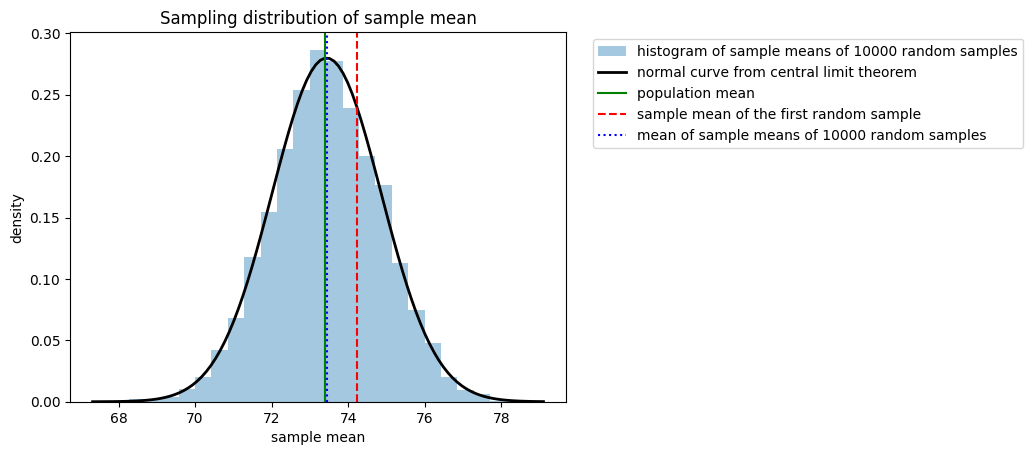

In [ ]:
plt.hist(estimate_df['estimate'], bins=25, density=True, alpha=0.4, label = "histogram of sample means of 10000 random samples")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) # generate a grid of 100 values from xmin to xmax.
p = stats.norm.pdf(x, mean_sample_means, stats.tstd(estimate_df['estimate']))
plt.plot(x, p,'k', linewidth=2, label = 'normal curve from central limit theorem')
plt.axvline(x=population_mean, color='g', linestyle = 'solid', label = 'population mean')
plt.axvline(x=estimate1, color='r', linestyle = '--', label = 'sample mean of the first random sample')
plt.axvline(x=mean_sample_means, color='b', linestyle = ':', label = 'mean of sample means of 10000 random samples')
plt.title("Sampling distribution of sample mean")
plt.xlabel('sample mean')
plt.ylabel('density')
plt.legend(bbox_to_anchor=(1.04,1))
plt.show()

There are three key takeaways from this graph:

 1. As the central limit theorem predicts, the histogram of the sampling distribution is well approximated by the normal distribution. The outline of the histogram closely follows the normal curve.
 2. The mean of the sampling distribution, the blue dotted line, overlaps with the population mean, the green solid line. This shows that the two means are essentially equal to each other.
 3. The sample mean of your first estimate of 50 districts, the red dashed line, is farther away from the center. This is due to sampling variability.

The central limit theorem shows that as you increase the sample size, your estimate becomes more accurate. For a large enough sample, the sample mean closely follows a normal distribution.

Your first sample of 50 districts estimated the mean district literacy rate as 74.22%, which is
 relatively close to the population mean of 73.4%.

To ensure your estimate will be useful to the government, you can compare the nation’s literacy rate to other benchmarks, such as the global literacy rate, or the literacy rate of peer nations. If the nation’s literacy rate is below these benchmarks, this may help convince the government to devote more resources to improving literacy across the country.


# 4. Confidence intervals

#### 1st dataset

Import libraries and document

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

education_districtwise = pd.read_csv("/content/sample_data/education_districtwise.csv")
education_districtwise = education_districtwise.dropna()

We’ll continue with our previous scenario, in which you’re a data professional working for the Department of Education of a large nation. Earlier, we imagined that the Department of Education asked you to collect the data on district literacy rates. You were only able to survey 50 randomly chosen districts, instead of all 634 districts included in your original dataset. You used Python to simulate taking a random sample of 50 districts, and make a point estimate of the population mean, or literacy rate for all districts.

Now imagine that the department asks you to construct a 95% confidence interval for your estimate of the mean district literacy rate. You can use Python to construct the confidence interval.

You can also use the same sample data that you worked with earlier. Write the code to have Python simulate the same random sample of district literacy rate data. First, name your variable sampled_data. Then, enter the arguments of the sample() function.

    • n: Your sample size is 50.
    • replace: Choose True because you are sampling with replacement.
    • random_state: Choose the same random number to generate the same results–previously, you used 31,208.

In [ ]:
 sampled_data =education_districtwise.sample(n=50,replace=True, random_state=31208)
 sampled_data.head(5)

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI
661,DISTRICT528,STATE6,9,112,89,1863174.0,92.14
216,DISTRICT291,STATE28,14,1188,165,3273127.0,52.49
367,DISTRICT66,STATE23,12,1169,116,1042304.0,62.14
254,DISTRICT458,STATE3,3,157,19,82839.0,76.33
286,DISTRICT636,STATE35,3,187,44,514683.0,86.70


The output shows 50 districts selected randomly from your dataset. Each has a different literacy rate.

Construct a 95% confidence interval

Now, construct a 95% confidence interval of the mean district literacy rate based on your sample data. Recall the four steps for constructing a confidence interval:

 1. Identify a sample statistic
 2. Choose a confidence level
 3. Find the margin of error
 4. Calculate the interval

scipy.stats.norm.interval()

Earlier, you worked through these steps one by one to construct a confidence interval. With Python, you can construct a confidence interval with just a single line of code–and get your results faster!

If you’re working with a large sample size, say larger than 30, you can construct a confidence
 interval for the mean using scipy.stats.norm.interval(). This function includes the following
 arguments:

    • alpha: The confidence level
    • loc: The sample mean
    • scale: The sample standard error

 Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html.

 Let’s explore each argument in more detail.

    • alpha: The confidence level The Department of Education requests a confidence level of 95%, which is the accepted standard for government funded research.
    • loc: The sample mean This is the mean literacy rate of your sample of 50 districts. Name a new variable sample_mean. Then, compute the mean district literacy rate for your sample data.

In [ ]:
sample_mean = sampled_data['OVERALL_LI'].mean()

scale: The sample standard error Recall that standard error measures the variability of your sample data. You may remember that the formula for the sample standard error is the sample standard deviation divided by the square root of the sample size.

Note: In practice, we typically don’t know the true standard error, so we replace it with the estimated standard error.

You can write code to express the formula and have Python do the calculation for you:

 1. Name a new variable estimated_standard_error.
 2. Take the standard deviation of your sample data, and divide by the square root of your
 sample.
 3. In parentheses, write the name of your data frame followed by the shape function and zero in brackets. Recall that the shape function returns the number of rows and columns in a data frame. shape[0] returns only the number of rows, which is the same number as your sample size.

In [ ]:
estimated_standard_error = sampled_data['OVERALL_LI'].std() / np.sqrt(sampled_data.shape[0])

Now you’re ready to put all this together to construct your confidence interval for the mean using scipy.stats.norm.interval(). First, write out the function and set the arguments:

    • alpha: Enter 0.95 because you want to use a 95% confidence level
    • loc: Enter the variable sample_mean
    • scale: Enter the variable estimated_standard_error

*Colab requires argument 'confidence' instead 'alpha'

In [ ]:
stats.norm.interval(confidence=0.95, loc=sample_mean, scale=estimated_standard_error)

(np.float64(71.42241096968617), np.float64(77.02478903031381))

You have a 95% confidence interval for the mean district literacy rate that stretches from about
 71.4% to 77.0%.

95% CI: (71.42, 77.02)
The Department of Education will use your estimate of the mean district literacy rate to help make decisions about distributing funds to different states.

Construct a 99% confidence interval

Now imagine that a senior director in the department wants to be even more confident aboutyour results. The director wants to make sure you have a reliable estimate, and suggests that you recalculate your interval with a 99% confidence level.

To compute a 99% confidence interval based on the same sample data, just change alpha to 0.99.

In [ ]:
stats.norm.interval(confidence=0.99, loc=sample_mean, scale=estimated_standard_error)

(np.float64(70.54221358373107), np.float64(77.90498641626891))

You have a 99% confidence interval for the mean district literacy rate that stretches from about 70.5% to 77.9%. 99% CI: (70.54, 77.90)

Relationship between confidence level and confidence interval

You may notice that as the confidence level gets higher, the confidence interval gets wider.

    • With a confidence level of 95%, the interval covers 5.6 percentage points (71.4%- 77.0%)
    • With a confidence level of 99%, the interval covers 7.4 percentage points (70.5%- 77.9%)

This is because a wider confidence interval is more likely to include the actual population parameter.

Your results will help the Department of Education decide how to distribute government resources to improve literacy.


#### 2nd dataset

You’ve just started your new role as a data analyst in the Strategy division of Ripple Renewable Energy (RRE). RRE operates in the following U.S. states: California, Florida, Michigan, Ohio, Pennsylvania, Texas. You’ve been tasked with constructing an analysis which identifies which of these states are most likely to be affected, should the new federal policy be enacted.

Your manager has requested that you do the following for your analysis: 1. Provide a summary of the mean AQI for the states in which RRE operates. 2. Construct a boxplot visualization for AQI of these states using seaborn. 3. Evaluate which state(s) may be most affected by this policy, based on the data and your boxplot visualization. 4. Construct a confidence interval for the RRE state with the highest mean AQI.

Import libraries and document


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

aqi= pd.read_csv('/content/sample_data/c4_epa_air_quality.csv')

Data exploration

In [ ]:
print(aqi.describe(include='all'))
print('________________________________________________________________________')
print(aqi['state_name'].value_counts())

        Unnamed: 0  date_local  state_name  county_name      city_name  \
count   260.000000         260         260          260            260   
unique         NaN           1          52          149            190   
top            NaN  2018-01-01  California  Los Angeles  Not in a city   
freq           NaN         260          66           14             21   
mean    129.500000         NaN         NaN          NaN            NaN   
std      75.199734         NaN         NaN          NaN            NaN   
min       0.000000         NaN         NaN          NaN            NaN   
25%      64.750000         NaN         NaN          NaN            NaN   
50%     129.500000         NaN         NaN          NaN            NaN   
75%     194.250000         NaN         NaN          NaN            NaN   
max     259.000000         NaN         NaN          NaN            NaN   

       local_site_name   parameter_name   units_of_measure  arithmetic_mean  \
count              257          

**Question:** What time range does this datacover?
 All of the sites collected data on January 1st, 2018.

**Question:** What are the minimum and maximum AQI values observed in the dataset?
 The minimum AQI value is 0 and the maximum AQI value is 50.

**Question:** Are all states equally represented in the dataset?
  California has 66 sites that reported AQI for this dataset, while states such as Delaware and Alabama have only one site that reported AQI, so, no, all states are not equally represented.


Statistical tests

Summarize the mean AQI for RRE states

In [ ]:
# Summarize the mean AQI for RRE states.

# Create a list of RRE states.
rre_states = ['California','Florida','Michigan','Ohio','Pennsylvania','Texas']

# Subset `aqi` to only consider these states.
aqi_rre = aqi[aqi['state_name'].isin(rre_states)]

# Find the mean aqi for each of the RRE states.
aqi_rre.groupby(['state_name']).agg({"aqi":"mean","state_name":"count"}) #alias as aqi_rre

,aqi,state_name
state_name,,
California,12.121212,66
Florida,5.500000,12
Michigan,8.111111,9
Ohio,3.333333,12
Pennsylvania,2.900000,10
Texas,2.700000,10


Create an in-line visualization showing the distribution of aqi by state_name

<ipython-input-337-1778725738>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=aqi_rre["state_name"],y=aqi_rre["aqi"], palette='Set1')


<Axes: xlabel='state_name', ylabel='aqi'>

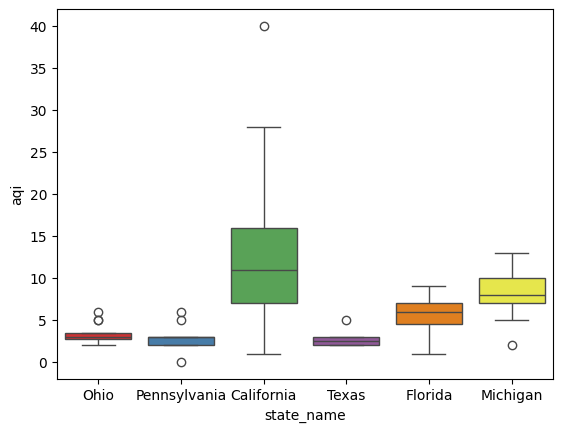

In [ ]:
sns.boxplot(x=aqi_rre["state_name"],y=aqi_rre["aqi"], palette='Set1')

Question: Based on the data and your visualizations, which state(s) do you suspect will be most affected by this policy?

    • California: Big portion of the boxplot range over 10.
    • Michigan: The mean is below 10 and the boxplot ranges is above 10.

Construct a confidence interval for the RRE state with the highest mean AQI

Recall the four-step process for constructing a confidence interval:
 1. Identify a sample statistic.
 2. Choose a confidence level.
 3. Find the margin of error.
 4. Calculate the interval.

Construct your sample statistic

To contruct your sample statistic, find the mean AQI for your state.

In [ ]:
aqi_ca = aqi[aqi['state_name']=='California']
sample_mean = aqi_ca['aqi'].mean().round(2)
sample_mean

np.float64(12.12)

Choose your confidence level

Choose your confidence level for your analysis. The most typical confidence level chosen is 95%; however, you can choose 90% or 99% if you want decrease or increase (respectively) your level of
confidence about your result.

In [ ]:
confidence_level = 0.95
confidence_level

0.95

Find your margin of error (ME)

Recall margin of error = z * standard error, where z is the appropriate z-value for the given confidence level. To calculate your margin of error:

    • Find your z-value.
    • Find the approximate z for common confidence levels.
    • Calculate your standard error estimate.

| Confidencial level | Z Score |
    |--------------|--------------|
    | 90%  | 1.65  |
    | 95%  | 1.96  |
    | 99%  | 2.58  |

In [ ]:
# Calculate your margin of error.

# Begin by identifying the z associated with your chosen confidence level.
z_value = 1.96

# Next, calculate your standard error.
# Standard Deviation / Square Root of the Sample Size
standard_error = aqi_ca['aqi'].std() / np.sqrt(aqi_ca.shape[0])
print("standard error:")
print(standard_error)

# Lastly, use the preceding result to calculate your margin of error.
margin_of_error = standard_error * z_value

print("margin of error:")
print(margin_of_error)

standard error:
0.8987209641127412
margin of error:
1.7614930896609726


Calculate your interval

Calculate both a lower and upper limit surrounding your sample mean to create your interval.

In [ ]:
# Calculate your confidence interval (upper and lower limits).

upper_ci_limit = sample_mean + margin_of_error
lower_ci_limit = sample_mean- margin_of_error
(lower_ci_limit, upper_ci_limit)

(np.float64(10.358506910339027), np.float64(13.881493089660971))

Subtract the margin of error from the sample mean to construct your lower limit, and add the margin of error to your sample mean to construct your upper limit.

Alternative: Construct the interval using scipy.stats.norm.interval()

scipy presents a simpler solution to developing a confidence interval. To use this, first import the stats module from scipy.

In [ ]:
# Import stats from scipy.
from scipy import stats

Step 4: Results and evaluation

Recalculate your confidence interval

Provide your chosen confidence_level, sample_mean, and standard_error to stats.norm.interval() and recalculate your confidence interval.

In [ ]:
stats.norm.interval(confidence=confidence_level, loc=sample_mean,scale=standard_error)

(np.float64(10.358539278187912), np.float64(13.881460721812086))

 Considerations (professor)

 What are key takeaways from this lab?

    • Based on the mean AQI for RRE states, California and Michigan were most likely to have experienced a mean AQI above 10.
    • With California experiencing the highest sample mean AQI in the data, it appears to be the state most likely to be affected by the policy change.
    • Constructing a confidence interval allowed you to estimate the sample mean AQI with a certain degree of confidence.

What findings would you share with others?

    • Present this notebook to convey the analytical process and describe the methodology behind constructing the confidence interval.
    • Convey that a confidence interval at the 95% level of confidence from this sample data yielded [10.36 , 13.88], which provides the interpretation “given the observed sample AQI measurements, there is a 95% confidence that the population mean AQI for California was between 10.36 and 13.88. This range is notably greater than 10.”
    • Share how varying the confidence level changes the interval. For example, if you varied the confidence level to 99%, the confidence interval would become [9.80 , 14.43].

What would you convey to external stakeholders?

    • Explain statistical significance at a high level.
    • Describe California’s observed mean AQI and suggest focusing on that state.
    • Share the result of the 95% confidence interval, describing what this means relative to the threshold of 10.
    • Convey any potential shortcomings of this analysis, such as the short time period being referenced.

# 5. hypothesis testing

#### T-test

Import libraries and document

In [ ]:
import pandas as pd
from scipy import stats

education_districtwise = pd.read_csv("/content/sample_data/education_districtwise.csv")
education_districtwise = education_districtwise.dropna()

Overview

This activity continues the scenario from an earlier part of the course, in which you are a data professional working for the Department of Education of a large nation. Recall that you are analyzing data on the literacy rate for each district.

Now imagine that the Department of Education asks you to collect data on mean district literacy rates for two of the nation’s largest states: STATE21 and STATE28. STATE28 has almost 40 districts, and STATE21 has more than 70. Due to limited time and resources, you are only able to survey 20 randomly chosen districts in each state. The department asks you to determine if the difference between the two mean district literacy rates is statistically significant or due to chance.  This will help the department decide how to distribute government funding to improve literacy. If there is a statistically-significant difference, the state with the lower literacy rate may receive more funding.  

In this activity, you will use Python to simulate taking a random sample of 20 districts in each state and conduct a two-sample t-test based on the sample data.

Explore the data

To start, filter your dataframe for the district literacy rate data from the states STATE21 and STATE28.

First, name a new variable: state21. Then, use the relational operator for equals (==) to get the relevant data from the STATNAME column.

In [ ]:
state21 = education_districtwise[education_districtwise['STATNAME'] == "STATE21"]

Next, name another variable: state28. Follow the same procedure to get the relevant data from the STATNAME column.

In [ ]:
state28 = education_districtwise[education_districtwise['STATNAME'] == "STATE28"]

Simulate random sampling

Now that you have organized your data, use the sample() function to take a random sample of 20 districts from each state. First, name a new variable: sampled_state21. Then, enter the arguments of the sample() function.

    • n: Your sample size is 20.
    • replace: Choose True because you are sampling with replacement.
    • random_state: Choose an arbitrary number for the random seed– how about 13490.

In [ ]:
sampled_state21 = state21.sample(n=20, replace = True, random_state=13490)

Now, name another variable: sampled_state28. Follow the same procedure, but this time choose a different number for the random seed; for example, 39,103.

In [ ]:
sampled_state28 = state28.sample(n=20, replace = True, random_state=39103)

Compute the sample means

You now have two random samples of 20 districts—one sample for each state. Next, use mean() to compute the mean district literacy rate for both STATE21 and STATE28.

In [ ]:
print(sampled_state21['OVERALL_LI'].mean())
print(sampled_state28['OVERALL_LI'].mean())

70.82900000000001
64.60100000000001


STATE21 has a mean district literacy rate of about 70.8%, while STATE28 has a mean district literacy rate of about 64.6%.

Based on your sample data, the observed difference between the mean district literacy rates of STATE21 and STATE28 is 6.2 percentage points (70.8%- 64.6%).

Note: At this point, you might be tempted to conclude that STATE21 has a higher overall literacy rate than STATE28. However, due to sampling variability, this observed difference might simply be due to chance, rather than an actual difference in the corresponding population means. A hypothesis test can help you determine whether or not your results are statistically significant.

Conduct a hypothesis test

Now that you’ve organized your data and simulated random sampling, you’re ready to conduct your hypothesis test. Recall that a two-sample t-test is the standard approach for comparing the means of two independent samples. To review, the steps for conducting a hypothesis test are:
 1. State the null hypothesis and the alternative hypothesis.
 2. Choose a significance level.
 3. Find the p-value.
 4. Reject or fail to reject the null hypothesis.

Step 1: State the null hypothesis and the alternative hypothesis The null hypothesis is a statement that is assumed to be true unless there is convincing evidence to the contrary. The alternative hypothesis is a statement that contradicts the null hypothesis and is accepted as true only if there is convincing evidence for it.

In a two-sample t-test, the null hypothesis states that there is no difference between the means of your two groups. The alternative hypothesis states the contrary claim: there is a difference between the means of your two groups.

We use H0 to denote the null hypothesis and HA to denote the alternative hypothesis.

    • H0: Thereisnodifference in the mean district literacy rates between STATE21 and STATE28.
    • HA: Thereis a difference in the mean district literacy rates between STATE21 and STATE28.

Step 2: Choose a significance level The significance level is the threshold at which you will consider a result statistically significant. This is the probability of rejecting the null hypothesis when it is true. The Department of Education asks you to use their standard level of 5%, or 0.05.

Step 3: Find the p-value P-value refers to the probability of observing results as or more extreme than those observed when the null hypothesis is true.

Based on your sample data, the difference between the mean district literacy rates of STATE21 and STATE28 is 6.2 percentage points. Your null hypothesis claims that this difference is due to chance. Your p-value is the probability of observing an absolute difference in sample means that is 6.2 or greater if the null hypothesis is true. If the probability of this outcome is very unlikely—in particular, if your p-value is less than your significance level of 5%— then you will reject the null hypothesis.

scipy.stats.ttest_ind() For a two-sample t-test, you can use scipy.stats.ttest_ind() to compute your p-value. This function includes the following arguments:
    • a: Observations from the first sample
    • b: Observations from the second sample
    • equal_var: A boolean, or true/false statement, which indicates whether the population variance of the two samples is assumed to be equal. In our example, you don’t have access to data for the entire population, so you don’t want to assume anything about the variance. To avoid making a wrong assumption, set this argument to False.

Reference: scipy.stats.ttest_ind

Now write your code and enter the relevant arguments:

    • a: Your first sample refers to the district literacy rate data for STATE21, which is stored in the OVERALL_LI column of your variable sampled_ state21.
    • b: Your second sample refers to the district literacy rate data for STATE28, which is stored in the OVERALL_LI column of your variable sampled_ state28.
    • equal_var: Set to False because you don’t want to assume that the two samples have the same variance.

In [ ]:
stats.ttest_ind(a=sampled_state21['OVERALL_LI'],b=sampled_state28['OVERALL_LI'], equal_var=False)

TtestResult(statistic=np.float64(2.8980444277268735), pvalue=np.float64(0.006421719142765237), df=np.float64(35.20796133045557))

Your p-value is about 0.0064, or 0.64%.

This means there is only a 0.64% probability that the absolute difference between the two mean district literacy rates would be 6.2 percentage points or greater if the null hypothesis were true. In other words, it’s highly unlikely that the difference in the two means is due to chance.

Reject or fail to reject the null hypothesis To draw a conclusion, compare your p-value with the significance level.

    • If the p-value is less than the significance level, you can conclude that there is a statistically significant difference in the mean district literacy rates between STATE21 and STATE28. In other words, you will reject the null hypothesis H0.
    • If the p-value is greater than the significance level, you can conclude that there is not a statistically significant difference in the mean district literacy rates between STATE21 and STATE28. In other words, you will fail to reject the null hypothesis H0.

Your p-value of 0.0064, or 0.64%, is less than the significance level of 0.05, or 5%. Therefore, you will reject the null hypothesis and conclude that there is a statistically significant difference between the mean district literacy rates of the two states: STATE21 and STATE28.

Your analysis will help the Department of Education decide how to distribute government resources. Since there is a statistically significant difference in mean district literacy rates, the state with the lower literacy rate, STATE28, will likely receive more resources to improve literacy.

#### Chi squared

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
data = {'Color': ['Red', 'Blue', 'Green', 'Red', 'Blue', 'Green'],
                'Gender': ['Male', 'Male', 'Male', 'Female', 'Female', 'Female']}
df = pd.DataFrame(data)
contingency_table = pd.crosstab(df['Gender'], df['Color'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p)

Chi-square statistic: 0.0
P-value: 1.0


# 5. Advanced hypothesis testing

Brief description of each:

**Chi-square (χ 2 ):** This test is primarily used to analyze the relationship between two categorical variables. It can be a goodness-of-fit test (to see if an observed distribution matches an expected distribution) or a test of independence (to see if two categorical variables are related).

**ANOVA (Analysis of Variance):** This test analyzes variance to determine if there are statistically significant differences between the means of two or more groups for a continuous dependent variable. For example, if you want to know if different teaching methods affect student performance.

**ANCOVA (Analysis of Covariance):** This is an extension of ANOVA that allows you to control for the effect of one or more continuous variables (called covariates) that could influence the dependent variable. This helps increase the precision of the analysis by eliminating unwanted variability.

**MANOVA (Multivariate Analysis of Variance):** This is an extension of ANOVA that is used when there are two or more continuous dependent variables. It assesses whether group means differ based on a linear combination of these dependent variables.

**MANCOVA (Multivariate Analysis of Covariance):** This is an extension of MANOVA that incorporates one or more covariates. It is used to analyze the effect of one or more categorical independent variables on two or more continuous dependent variables, while controlling for the effects of one or more continuous covariates.

#### One-way and two-way ANOVA (Part I)

• One-way ANOVA: Compares the means of one continuous dependent variable based on three or more groups of one categorical variable.

Relevant Imports

In [ ]:
# Import pandas and seaborn packages
import pandas as pd
import seaborn as sns

# Load in diamonds data set from seaborn package
diamonds = sns.load_dataset("diamonds", cache=False)

# Examine first 5 rows of data set
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Data cleaning I

For this part of the course, our main focus is on one-way and two-way ANOVA. This means that our dataset needs a continuous variable, and up to two categorical variables.

In [ ]:
# Check how many diamonds are each color grade
diamonds["color"].value_counts()

,count
color,
G,11292
E,9797
F,9542
H,8304
D,6775
I,5422
J,2808


In [ ]:
# Subset for colorless diamonds
colorless = diamonds[diamonds["color"].isin(["E","F","H","D","I"])]

# Select only color and price columns, and reset index
colorless = colorless[["color","price"]].reset_index(drop=True)

 **Note:** We took a subset of colorless and near colorless diamonds. We excluded G color grade diamonds as there were many more of them, and we excluded J color grade diamonds as there were significantly fewer of them. In a workplace setting, you would typically go through a more
 thoughtful process of subsetting. The goal of this notebook is focusing on ANOVA, not data cleaning or variable selection.

In [ ]:
# Remove dropped categories of diamond color
colorless.color = colorless.color.cat.remove_categories(["G","J"])

# Check that the dropped categories have been removed
colorless["color"].values

['E', 'E', 'E', 'I', 'I', ..., 'D', 'D', 'D', 'H', 'D']
Length: 39840
Categories (5, object): ['D', 'E', 'F', 'H', 'I']

In [ ]:
# Import math package
import math

# Take the logarithm of the price, and insert it as the third column
colorless.insert(2, "log_price", [math.log(price) for price in colorless["price"]])

**Note:** The first argument in the insert() function allows you to specify the location of the new column with a column number. But the argument starts counting at 0. So if you put in 0, that is the first column; if you enter 1, that is the second column, and so on. Since we specified 2, the new log_price column will be the third column.

 Next, we use the dropna() function to drop the rows with missing values. Setting the inplace argument to True means that we do not have to save the dataframe as a new variable. Then, we’ll reset the index using the reset_index() function to reset the index column to account for the rows we just dropped. The inplace argument works the same as it did for the dropna() function, and the drop argument prevents us from creating a new column with the old index numbers preserved.


In [ ]:
# Drop rows with missing values
colorless.dropna(inplace=True)

# Reset index
colorless.reset_index(inplace=True, drop=True)

# Examine first 5 rows of cleaned data set
colorless.head()

,color,price,log_price
0,E,326,5.786897
1,E,326,5.786897
2,E,327,5.789960
3,I,334,5.811141
4,I,336,5.817111


In [ ]:
# Save to diamonds.csv
colorless.to_csv('diamonds.csv',index=False,header=list(colorless.columns))

**Note:** The code creates a new .csv file of the colorless dataframe, and names it diamonds.csv. The index argument tells the function whether or not we want to save the index column as a column in the .csv file. Additionally, the header argument tells the function what the names of the columns should be.

One-way ANOVA

To run one-way ANOVA, we first load in the data, and save it as a variable called diamonds, and then examine it using the head() function.


In [ ]:
# Save diamonds.csv as a variable called diamonds
diamonds = pd.read_csv("diamonds.csv")

# Examine first 5 rows of diamonds data set
diamonds.head()

,color,price,log_price
0,E,326,5.786897
1,E,326,5.786897
2,E,327,5.789960
3,I,334,5.811141
4,I,336,5.817111


Recall that one-way ANOVA helps us better understand the relationship between a categorical variable and a continuous variable. We’ll do some basic exploratory data analysis by creating a boxplot using the boxplot() function from the seaborn package.

Based on the plot, we can observe that there is a lot of overlap in the distribution of log_price for each color of diamond. But we can’t tell yet if they are statistically significantly different.


<Axes: xlabel='color', ylabel='log_price'>

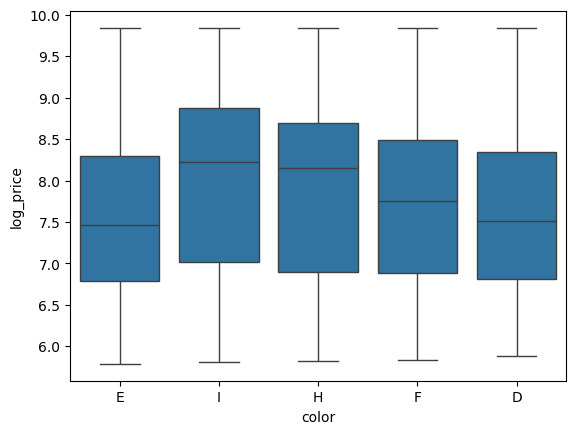

In [ ]:
# Create boxplot to show distribution of price by color grade
sns.boxplot(x = "color", y = "log_price", data = diamonds)

In order to run ANOVA, we need to create a regression model. To do this, we’ll import the statsmodels.api package and the ols() function. Next, we’ll create a simple linear regression model where the X variable is color, which we will code as categorical using C(). Then, we’ll fit the model to the data, and generate model summary statistics.

In [ ]:
# Import statsmodels and ols function
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Construct simple linear regression model, and fit the model
model = ols(formula = "log_price ~ C(color)", data = diamonds).fit()

# Get summary statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     265.0
Date:                Wed, 18 Jun 2025   Prob (F-statistic):          3.61e-225
Time:                        03:10:11   Log-Likelihood:                -56182.
No. Observations:               39840   AIC:                         1.124e+05
Df Residuals:                   39835   BIC:                         1.124e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.6169      0.012    632.421      0.000       7.593       7.641
C(color)[T.E]    -0.0375      0.016     -2.394      0.017      -0.068      -0.007
C(color)[T.F]     0.1455      0.016      9.240      0.000       0.115       0.176
C(color)[T.H]     0.3015      0.016     18.579      0.000       0.270       0.333
C(color)[T.I]     0.4061      0.018     22.479      0.000       0.371       0.441
==============================================================================
Omnibus:                     7112.992   Durbin-Watson:                   0.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1542.881
Skew:                           0.079   Prob(JB):                         0.00
Kurtosis:                       2.049   Cond. No.                         6.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the model summary table, the color grades’ associated beta coefficients all have a p-value of less than 0.05 (check the P>|t| column). But we can’t be sure if there is a significant price difference between the various color grades. This is where one-way ANOVA comes in.

 First, we have to state our null and alternative hypotheses:

 Null Hypothesis

 H0 : priceD = priceE = priceF = priceH = priceI

 There is no difference in the price of diamonds based on color grade.

 Alternative Hypothesis

 H1 : Not priceD = priceE = priceF = priceH = priceI

 There is a difference in the price of diamonds based on color grade.


In [ ]:
# Run one-way ANOVA
sm.stats.anova_lm(model, typ = 2)

,sum_sq,df,F,PR(>F)
C(color),1041.690290,4.0,264.987395,3.609774e-225
Residual,39148.779822,39835.0,NaN,NaN


In [ ]:
sm.stats.anova_lm(model, typ = 1)

,df,sum_sq,mean_sq,F,PR(>F)
C(color),4.0,1041.690290,260.422572,264.987395,3.609774e-225
Residual,39835.0,39148.779822,0.982773,NaN,NaN


In [ ]:
sm.stats.anova_lm(model, typ = 3)

,sum_sq,df,F,PR(>F)
Intercept,393066.804852,1.0,399956.684283,0.000000e+00
C(color),1041.690290,4.0,264.987395,3.609774e-225
Residual,39148.779822,39835.0,NaN,NaN


We use the anova_lm() function from the statsmodels.stats package. As noted previously, the function requires a fitted regression model, and for us to specify the type of ANOVA: 1, 2, or 3.

 You can review the statsmodels documentation to learn more, as well as to this article and this explanation on StackExchange. Since the p-value (column PR(>F)) is very small, we can reject the null hypothesis that the mean of the price is the same for all diamond color grades.

 Technical note: The type of an ANOVA and the number of ways of an ANOVA are two distinct concepts: “type” (typ in statsmodels.stats.anova.anova_lm()) refers to how the sums of squares (these quantities are the building blocks for ANOVA) are calculated, while “K-way” means that there are K categorical factors in the analysis.

 **Data cleaning II (not shown in video)**

 In this part of the notebook, we will prepare a second dataset so we can perform a two-way ANOVA, which requires two categorical variables. We will start with the same diamonds dataset from the seaborn package.


In [ ]:
# Import diamonds data set from seaborn package
diamonds = sns.load_dataset("diamonds", cache=False)

# Examine first 5 rows of data set
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Below, we go through a very similar process as above. We start by selecting the columns of interest: color, cut, and price. Then, we subset only for certain color grades, and remove the dropped colors from the list of categories using the remove_categories() function.

 Next, we subset for specific diamond cuts: Ideal, Premium, and Very Good, and remove the dropped cuts from the list of categories.

 Next, we remove rows with missing data, and reset the index.

 Lastly, we add in a column for the logarithm of the price.


In [ ]:
# Subset for color, cut, price columns
diamonds2 = diamonds[["color","cut","price"]]

# Only include colorless diamonds
diamonds2 = diamonds2[diamonds2["color"].isin(["E","F","H","D","I"])]

# Drop removed colors, G and J
diamonds2.color = diamonds2.color.cat.remove_categories(["G","J"])

# Only include ideal, premium, and very good diamonds
diamonds2 = diamonds2[diamonds2["cut"].isin(["Ideal","Premium","Very Good"])]

# Drop removed cuts
diamonds2.cut = diamonds2.cut.cat.remove_categories(["Good","Fair"])

# Drop NaNs
diamonds2.dropna(inplace = True)

# Reset index
diamonds2.reset_index(inplace = True, drop = True)

# Add column for logarithm of price
diamonds2.insert(3,"log_price",[math.log(price) for price in diamonds2["price"]])

In [ ]:
# Examine the data set
diamonds2.head()

,color,cut,price,log_price
0,E,Ideal,326,5.786897
1,E,Premium,326,5.786897
2,I,Premium,334,5.811141
3,I,Very Good,336,5.817111
4,H,Very Good,337,5.820083


Then we’ll create a multiple linear regression model using the ols() function, fit the model to the data, and get the summary statistics.

Note: This regression model includes two categorical X variables: color and cut, and a variable to account for the interaction between color and cut. The interaction is denoted using the : symbol.


In [ ]:
# Construct a multiple linear regression with an interaction term between color and cut
model2 = ols(formula = "log_price ~ C(color) + C(cut) + C(color):C(cut)", data = diamonds2).fit()

# Get summary statistics
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     119.5
Date:                Wed, 18 Jun 2025   Prob (F-statistic):               0.00
Time:                        03:10:12   Log-Likelihood:                -49159.
No. Observations:               34935   AIC:                         9.835e+04
Df Residuals:                   34920   BIC:                         9.847e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             7.4567      0.019    401.583      0.000       7.420       7.493
C(color)[T.E]                        -0.0056      0.024     -0.231      0.817      -0.053       0.042
C(color)[T.F]                         0.1755      0.024      7.166      0.000       0.128       0.224
C(color)[T.H]                         0.2756      0.026     10.739      0.000       0.225       0.326
C(color)[T.I]                         0.3787      0.028     13.294      0.000       0.323       0.435
C(cut)[T.Premium]                     0.2828      0.031      9.153      0.000       0.222       0.343
C(cut)[T.Very Good]                   0.2295      0.031      7.290      0.000       0.168       0.291
C(color)[T.E]:C(cut)[T.Premium]      -0.0322      0.040     -0.800      0.424      -0.111       0.047
C(color)[T.F]:C(cut)[T.Premium]       0.0313      0.040      0.775      0.438      -0.048       0.110
C(color)[T.H]:C(cut)[T.Premium]       0.0947      0.041      2.308      0.021       0.014       0.175
C(color)[T.I]:C(cut)[T.Premium]       0.0841      0.046      1.832      0.067      -0.006       0.174
C(color)[T.E]:C(cut)[T.Very Good]    -0.0931      0.041     -2.294      0.022      -0.173      -0.014
C(color)[T.F]:C(cut)[T.Very Good]    -0.1013      0.041     -2.459      0.014      -0.182      -0.021
C(color)[T.H]:C(cut)[T.Very Good]    -0.0247      0.043     -0.576      0.564      -0.109       0.059
C(color)[T.I]:C(cut)[T.Very Good]     0.0359      0.048      0.753      0.451      -0.057       0.129
==============================================================================
Omnibus:                     4862.888   Durbin-Watson:                   0.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1246.556
Skew:                           0.108   Prob(JB):                    2.06e-271
Kurtosis:                       2.100   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the model summary table, many of the color grades’ and cuts’ associated beta coefficients have a p-value of less than 0.05 (check the P>|t| column). Additionally, some of the interactions also seem statistically significant. We’ll use a two-way ANOVA to examine further the relationships between price and the two categories of color grade and cut.

 First, we have to state our three pairs of null and alternative hypotheses:

 Null Hypothesis (Color)

 H0 : priceD = priceE = priceF = priceH = priceI

 There is no difference in the price of diamonds based on color.

 Alternative Hypothesis (Color)

 H1 : Not priceD = priceE = priceF = priceH = priceI

 There is a difference in the price of diamonds based on color.

 Null Hypothesis (Cut)

 H0 : priceIdeal = pricePremium = priceVeryGood

 There is no difference in the price of diamonds based on cut.

 Alternative Hypothesis (Cut)

 H1 : Not priceIdeal = pricePremium = priceVeryGood

 There is a difference in the price of diamonds based on cut.

 Null Hypothesis (Interaction)

 H0 : The effect of color on diamond price is independent of the cut, and vice versa.

 Alternative Hypothesis (Interaction)

 H1 : There is an interaction effect between color and cut on diamond price.

 The syntax for a two-way ANOVA is the same as for a one-way ANOVA. We will continue to use the anova_lm() function from statsmodels.stats.


In [ ]:
# Run two-way ANOVA
sm.stats.anova_lm(model2, typ = 2)

,sum_sq,df,F,PR(>F)
C(color),926.361461,4.0,237.014783,3.481145e-201
C(cut),630.641441,2.0,322.706309,1.348511e-139
C(color):C(cut),27.478611,8.0,3.515279,4.531734e-04
Residual,34120.806577,34920.0,NaN,NaN


In [ ]:
sm.stats.anova_lm(model2, typ = 1)

,df,sum_sq,mean_sq,F,PR(>F)
C(color),4.0,977.195814,244.298954,250.021037,3.747388e-212
C(cut),2.0,630.641441,315.320721,322.706309,1.348511e-139
C(color):C(cut),8.0,27.478611,3.434826,3.515279,4.531734e-04
Residual,34920.0,34120.806577,0.977114,NaN,NaN


In [ ]:
sm.stats.anova_lm(model2, typ = 3)

,sum_sq,df,F,PR(>F)
Intercept,157578.043681,1.0,161268.910012,0.000000e+00
C(color),319.145817,4.0,81.655250,4.134649e-69
C(cut),100.144107,2.0,51.244864,5.987341e-23
C(color):C(cut),27.478611,8.0,3.515279,4.531734e-04
Residual,34120.806577,34920.0,NaN,NaN


Since all of the p-values (column PR(>F)) are very small, we can reject all three null hypotheses.

#### ANOVA post hoc test (Part II)

• Two-way ANOVA: Compares the means of one continuous dependent variable based on three or more groups of two categorical variables.
All the information you need for solving this assignment is in this notebook, and all the code you will be implementing will take place within this notebook.

This part of the notebook contains all of the code that will be presented in the second part of this section in the course. The focus is on post hoc tests after one-way ANOVA using the statsmodels package in Python.

 Recall the following definitions:

 • One-way ANOVA: Compares the means of one continuous dependent variable based on
 three or more groups of one categorical variable.

 • Posthoctest: Performs a pairwise comparison between all available groups while controlling
 for the error rate.

**Note:** Recall that if we run multiple hypothesis tests all with a 95% confidence level, there is an increasing chance of a false positive, or falsely rejecting the null hypothesis. The post hoc test will control for this, and allows us to run many hypothesis tests while remaining confident with the accuracy of the results. Otherwise, be very careful when running multiple hypothesis tests.

Relevant Imports

 We’ll start by importing the statsmodels package and the ols function so we can construct a simple linear regression model. Next, we load in the dataset from the one-way ANOVA.

** Note:** Running a post hoc test on two-way ANOVA is a bit more advanced and outside the scope of this program, but feel free to explore that on your own.


In [ ]:
# Import statsmodels package and ols function
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load in the data set from one-way ANOVA
diamonds = pd.read_csv("diamonds.csv")

**One-way ANOVA**

Here we follow the same steps as above: 1. Build a simple linear regression model 2. Check the results 3. Run one-way ANOVA

In [ ]:
# Construct simple linear regression model, and fit the model
model = ols(formula = "log_price ~ C(color)", data = diamonds).fit()

# Get summary statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     265.0
Date:                Wed, 18 Jun 2025   Prob (F-statistic):          3.61e-225
Time:                        03:11:28   Log-Likelihood:                -56182.
No. Observations:               39840   AIC:                         1.124e+05
Df Residuals:                   39835   BIC:                         1.124e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.6169      0.012    632.421      0.000       7.593       7.641
C(color)[T.E]    -0.0375      0.016     -2.394      0.017      -0.068      -0.007
C(color)[T.F]     0.1455      0.016      9.240      0.000       0.115       0.176
C(color)[T.H]     0.3015      0.016     18.579      0.000       0.270       0.333
C(color)[T.I]     0.4061      0.018     22.479      0.000       0.371       0.441
==============================================================================
Omnibus:                     7112.992   Durbin-Watson:                   0.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1542.881
Skew:                           0.079   Prob(JB):                         0.00
Kurtosis:                       2.049   Cond. No.                         6.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now that we have reconstructed the simple linear regression model, we can re-run the ANOVA.

In [ ]:
# Run one-way ANOVA
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(color),1041.690290,4.0,264.987395,3.609774e-225
Residual,39148.779822,39835.0,NaN,NaN


Since the p-value is very small and we can reject the null hypothesis that the mean price is the same for all diamond color grades, we can continue on to run a post hoc test. The post hoc test is useful because the one-way ANOVA does not tell us which colors are associated with different prices. The post hoc test will give us more information.

Post hoc test

There are many post hoc tests that can be run. One of the most common ANOVA post hoc tests  is the Tukey’s HSD (honestly significantly different) test. We can import the pairwise_tukeyhsd() function from the statsmodels package to run the test.


In [ ]:
# Import Tukey's HSD function
from statsmodels.stats.multicomp import pairwise_tukeyhsd

Then we can run the test. The endog variable specifies which variable is being compared across groups, which is log_price in this case. Then the groups variables indicates which variable holds the groups we’re comparing, which is color. alpha tells the function the significance or confidence level, which we’ll set to 0.05. We’ll aim for the typical 95% confidence level.

In [ ]:
# Run Tukey's HSD post hoc test for one-way ANOVA
tukey_oneway = pairwise_tukeyhsd(endog = diamonds["log_price"], groups = diamonds["color"], alpha = 0.05)

Lastly, we get the results of the test.

In [ ]:
# Get results (pairwise comparisons)
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
D,E,-0.0375,0.1169,-0.0802,0.0052,False
D,F,0.1455,0.0,0.1026,0.1885,True
D,H,0.3015,0.0,0.2573,0.3458,True
D,I,0.4061,0.0,0.3568,0.4553,True
E,F,0.183,0.0,0.1441,0.2219,True
E,H,0.339,0.0,0.2987,0.3794,True
E,I,0.4436,0.0,0.3978,0.4893,True
F,H,0.156,0.0,0.1154,0.1966,True
F,I,0.2605,0.0,0.2145,0.3065,True
H,I,0.1045,0.0,0.0573,0.1517,True


Each row represents a pariwise comparison between the prices of two diamond color grades. The reject column tells us which null hypotheses we can reject. Based on the values in that column, we can reject each null hypothesis, except when comparing D and E color diamonds. We cannot reject the null hypothesis that the diamond price of D and E color diamonds are the same.

 Test 1: D vs. E H0 :priceD =price

 The price of D and E color grade diamonds are the same.

 H1 : priceD= price

 The price of D and E color grade diamonds are not the same.

 Result: We cannot reject the null hypothesis that the price of D and E color grade diamonds are
 the same.

 Test 2: D vs. F H0 :priceD =priceF

 The price of D and F color grade diamonds are the same.

 H1 : priceD= priceF

 The price of D and F color grade diamonds are not the same.

 Result: We can reject the null hypothesis that the price of D and F color grade diamonds are the same.

 Test 3: D vs. H H0 :priceD =priceH

 The price of D and H color grade diamonds are the same.

 H1 : priceD= priceH

 The price of D and H color grade diamonds are not the same.

 Result: We can reject the null hypothesis that the price of D and H color grade diamonds are the same.

Test 4: D vs. I H0 :priceD = priceI

 The price of D and I color grade diamonds are the same.

 H1 : priceD= priceI

 The price of D and I color grade diamonds are not the same.

 Result: We can reject the null hypothesis that the price of D and I color grade diamonds are the
 same.

 Test 5: E vs. F H0 :priceE = priceF

 The price of E and F color grade diamonds are the same.

 H1 : priceE= priceF

 The price of E and F color grade diamonds are not the same.

 Result: We can reject the null hypothesis that the price of E and F color grade diamonds are the
 same.
 Test 6: E vs. H H0 :priceE =priceH

 The price of E and H color grade diamonds are the same.

 H1 : priceE= priceH

 The price of E and H color grade diamonds are not the same.

 Result: We can reject the null hypothesis that the price of E and H color grade diamonds are the same.

 Test 7: E vs. I H0 :priceE = priceI

 The price of E and I color grade diamonds are the same.

 H1 : priceE= priceI

 The price of E and I color grade diamonds are not the same.

 Result: We can reject the null hypothesis that the price of E and I color grade diamonds are the
 same.

 Test 8: F vs. H H0 :priceF =priceH

 The price of F and H color grade diamonds are the same.

 H1 : priceF= priceH

 The price of F and H color grade diamonds are not the same.

 Result: We can reject the null hypothesis that the price of F and H color grade diamonds are the same.

Test 9: F vs. I H0 :priceF = priceI

 The price of F and I color grade diamonds are the same.

 H1 : priceF= priceI

 The price of F and I color grade diamonds are not the same.

 Result: We can reject the null hypothesis that the price of F and I color grade diamonds are the
 same.

 Test 10: H vs. I H0 :priceH = priceI

 The price of H and I color grade diamonds are the same.

 H1 : priceH= priceI

 The price of H and I color grade diamonds are not the same.

 Result: We can reject the null hypothesis that the price of H and I color grade diamonds are the
 same.


#### ANCOVA

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

# 1. Create a sample dataset
data = {
    'teaching_method': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C'],
    'test_score': [75, 80, 78, 85, 88, 82, 90, 92, 89],
    'study_hours': [10, 12, 11, 15, 14, 13, 18, 17, 16]
}
df = pd.DataFrame(data)

# 2. Perform ANCOVA using statsmodels' OLS (Ordinary Least Squares)
# The formula specifies: dependent_variable ~ categorical_independent_variable + continuous_covariate
model = smf.ols('test_score ~ C(teaching_method) + study_hours', data=df).fit()

# 3. Print the ANCOVA results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             test_score   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     19.55
Date:                Thu, 19 Jun 2025   Prob (F-statistic):            0.00342
Time:                        02:35:30   Log-Likelihood:                -16.758
No. Observations:                   9   AIC:                             41.52
Df Residuals:                       5   BIC:                             42.31
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=9 observations were given.
  return hypotest_fun_in(*args, **kwds)


#### MANOVA

In [ ]:
import pandas as pd
from statsmodels.multivariate.manova import MANOVA

# 1. Create a sample dataset
data = pd.DataFrame({
    'Group': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C'],
    'Score_X': [10, 12, 11, 15, 14, 16, 8, 9, 10],
    'Score_Y': [20, 22, 21, 25, 24, 26, 18, 19, 20]
})

# 2. Perform the MANOVA
# The formula specifies the dependent variables (Score_X + Score_Y)
# and the independent variable (Group)
manova = MANOVA.from_formula('Score_X + Score_Y ~ Group', data=data)

# 3. Print the results
print(manova.mv_test())

                                Multivariate linear model
                                                                                          
------------------------------------------------------------------------------------------
       Intercept                Value          Num DF Den DF        F Value         Pr > F
------------------------------------------------------------------------------------------
          Wilks' lambda                -0.0000 2.0000 5.0000 -5629499534213122.0000 1.0000
         Pillai's trace                 1.0000 2.0000 5.0000 -5629499534213122.0000 1.0000
 Hotelling-Lawley trace -2251799813685249.0000 2.0000 5.0000 -5629499534213122.0000 1.0000
    Roy's greatest root -2251799813685249.0000 2.0000 5.0000 -5629499534213122.0000 1.0000
------------------------------------------------------------------------------------------
                                                                                          
--------------------------------

#### MANCOVA

In [ ]:
import pandas as pd
from statsmodels.multivariate.manova import MANOVA

# 1. Create a sample DataFrame
# 'Group' is the categorical independent variable (factor)
# 'Covariate' is the continuous independent variable (covariate)
# 'DV1' and 'DV2' are the multiple dependent variables
data = pd.DataFrame({
    'Group': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C'],
    'Covariate': [10, 12, 11, 15, 14, 16, 20, 19, 21],
    'DV1': [5, 7, 6, 9, 8, 10, 12, 11, 13],
    'DV2': [15, 18, 17, 20, 22, 21, 25, 24, 26]
})

# 2. Define the MANCOVA model using a formula
# The formula specifies the dependent variables (DV1 + DV2)
# followed by a tilde (~), then the independent variables (Group + Covariate).
# 'Group' is treated as a categorical factor, and 'Covariate' as a continuous covariate.
formula = 'DV1 + DV2 ~ Group + Covariate'

# 3. Create a MANOVA object and fit the model
# The MANOVA class from statsmodels handles both MANOVA and MANCOVA.
mancova = MANOVA.from_formula(formula, data=data)

# 4. Perform the multivariate test and print the results
# The mv_test() method provides the results, including Wilks' Lambda,
# Pillai's Trace, Hotelling-Lawley Trace, and Roy's Largest Root,
# along with their respective p-values.
print(mancova.mv_test())

                             Multivariate linear model
                                                                                    
------------------------------------------------------------------------------------
         Intercept              Value        Num DF Den DF      F Value       Pr > F
------------------------------------------------------------------------------------
            Wilks' lambda             0.0000 2.0000 4.0000 7151408697688.3467 0.0000
           Pillai's trace             1.0000 2.0000 4.0000 7151408697688.3467 0.0000
   Hotelling-Lawley trace 3575704348844.1733 2.0000 4.0000 7151408697688.3467 0.0000
      Roy's greatest root 3575704348844.1733 2.0000 4.0000 7151408697688.3467 0.0000
------------------------------------------------------------------------------------
                                                                                    
------------------------------------------------------------------------------------
          

/usr/local/lib/python3.11/dist-packages/statsmodels/multivariate/multivariate_ols.py:216: RuntimeWarning: divide by zero encountered in scalar divide
  b = (p + 2*n) * (q + 2*n) / 2 / (2*n + 1) / (n - 1)
/usr/local/lib/python3.11/dist-packages/statsmodels/multivariate/multivariate_ols.py:216: RuntimeWarning: divide by zero encountered in scalar divide
  b = (p + 2*n) * (q + 2*n) / 2 / (2*n + 1) / (n - 1)
/usr/local/lib/python3.11/dist-packages/statsmodels/multivariate/multivariate_ols.py:216: RuntimeWarning: divide by zero encountered in scalar divide
  b = (p + 2*n) * (q + 2*n) / 2 / (2*n + 1) / (n - 1)


#### Final